In [42]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib._color_data as mcd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime as dt
from datetime import timedelta

import datetime
from sklearn import preprocessing

In [45]:
#Datasets:

data =pd.read_csv(r'H:\Thesis\Datasets\dataset\United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv', parse_dates=["submission_date"], index_col="submission_date", dayfirst=True)
data1 =pd.read_csv(r'H:\Thesis\Datasets\dataset\us_states_covid19_daily.csv', parse_dates=["date"], index_col="date", dayfirst=True)
data.index.names = ['Date']

data2 =pd.read_csv(r'H:\Thesis\Datasets\dataset\States1.csv')


#data2.head()

In [18]:
# Dropping Columns
data.drop(['conf_cases','new_case','new_death', 'prob_cases','pnew_case','conf_death','prob_death','pnew_death','created_at','consent_cases','consent_deaths'],axis=1, inplace=True)


In [19]:
# Adding Columns

data['day'] = data.index.day
data['month'] = data.index.month
data['year'] = data.index.year

data.head()

,state,tot_cases,tot_death,day,month,year
Date,,,,,,
2020-01-22,CO,0,0,22,1,2020
2020-01-23,CO,0,0,23,1,2020
2020-01-24,CO,0,0,24,1,2020
2020-01-25,CO,0,0,25,1,2020
2020-01-26,CO,0,0,26,1,2020


In [20]:
# Extracting the states
df_CO = data[(data.state == "CO")]
df_WA = data[(data.state == "WA")]
df_CA = data[(data.state == "CA")]
df_NY = data[(data.state == "NY")]
df_NYC = data[(data.state == "NYC")]

df_NYC_train = df_WA[ '2020-01-22' : '2020-08-5']


In [21]:
Day = df_NYC_train.groupby(['month','day'])['tot_cases'].sum()



In [39]:
x = np.arange(len(Day))
y = Day.values

# Future forecasting for the next 30 days

days_in_future = 30
future_forecast = np.array([i for i in range(len(Day)+days_in_future)]).reshape(-1,1)
adjusted_dates = future_forecast[:-10]

# Converting all integers to datetime for better visuals
start = '1/22/2020'
start_date= datetime.datetime.strptime(start,'%m/%d/%Y')
future_dates = []
for i in range(len(future_forecast)):
    future_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))



array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [23]:
Poly = PolynomialFeatures(degree=4)
X = Poly.fit_transform(x.reshape(-1,1))

In [24]:
pd.DataFrame(X).tail()

,0,1,2,3,4
192,1.0,192.0,36864.0,7077888.0,1.358954e+09
193,1.0,193.0,37249.0,7189057.0,1.387488e+09
194,1.0,194.0,37636.0,7301384.0,1.416468e+09
195,1.0,195.0,38025.0,7414875.0,1.445901e+09
196,1.0,196.0,38416.0,7529536.0,1.475789e+09


In [25]:
reg = LinearRegression()
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [26]:
reg.coef_

array([ 0.00000000e+00, -3.54982827e+02,  1.00936152e+01, -7.41389803e-02,
        2.03255176e-04])

In [27]:
reg.intercept_

2303.9507594055613

In [28]:
y_Predict = reg.predict(X)

In [29]:
y_Predict = reg.predict(X)

In [30]:
reg.score(X,y)*100

99.68376988296089

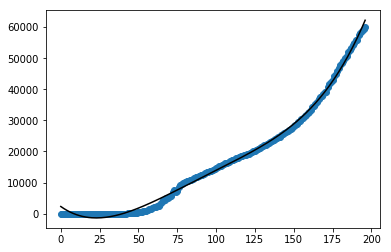

In [31]:

plt.scatter(x,y)
plt.plot(x,y_Predict,color = 'k')
plt.show()

In [32]:
rmse = np.sqrt(mean_squared_error(y,y_Predict))
r2 = r2_score(y,y_Predict)

print("The model performance:")
print("RMSE : {}". format(rmse))
print("R2 Score : {}".format(r2))

The model performance:
RMSE : 957.6216821764974
R2 Score : 0.9968376988296089


In [33]:
#reg.predict(Poly.transform([[156]]))

poly_pred=reg.predict(Poly.transform(future_forecast))
future_forecast
# Forecast for next 30 days

print('Polynomial regression future forecast')
set(zip(future_dates[-30:],poly_pred[-30:]))

#print(poly_pred)

Polynomial regression future forecast


{('08/06/2020', 63405.731939061516),
 ('08/07/2020', 64625.393494125194),
 ('08/08/2020', 65872.78656877429),
 ('08/09/2020', 67148.43463678678),
 ('08/10/2020', 68452.86605006512),
 ('08/11/2020', 69786.61403863569),
 ('08/12/2020', 71150.21671064931),
 ('08/13/2020', 72544.21705238085),
 ('08/14/2020', 73969.1629282296),
 ('08/15/2020', 75425.6070807188),
 ('08/16/2020', 76914.10713049636),
 ('08/17/2020', 78435.22557633405),
 ('08/18/2020', 79989.52979512786),
 ('08/19/2020', 81577.59204189829),
 ('08/20/2020', 83199.98944978986),
 ('08/21/2020', 84857.30403007142),
 ('08/22/2020', 86550.12267213583),
 ('08/23/2020', 88279.03714350052),
 ('08/24/2020', 90044.64408980694),
 ('08/25/2020', 91847.54503482085),
 ('08/26/2020', 93688.34638043208),
 ('08/27/2020', 95567.65940665483),
 ('08/28/2020', 97486.10027162766),
 ('08/29/2020', 99444.29001161305),
 ('08/30/2020', 101442.85454099788),
 ('08/31/2020', 103482.42465229332),
 ('09/01/2020', 105563.63601613452),
 ('09/02/2020', 107687.12

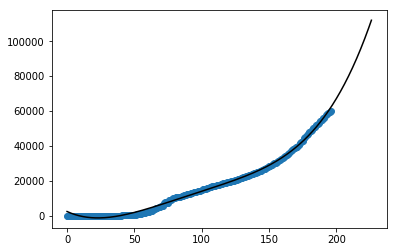

In [34]:
plt.scatter(x,y)
plt.plot(future_forecast,poly_pred,color = 'k')
plt.show()



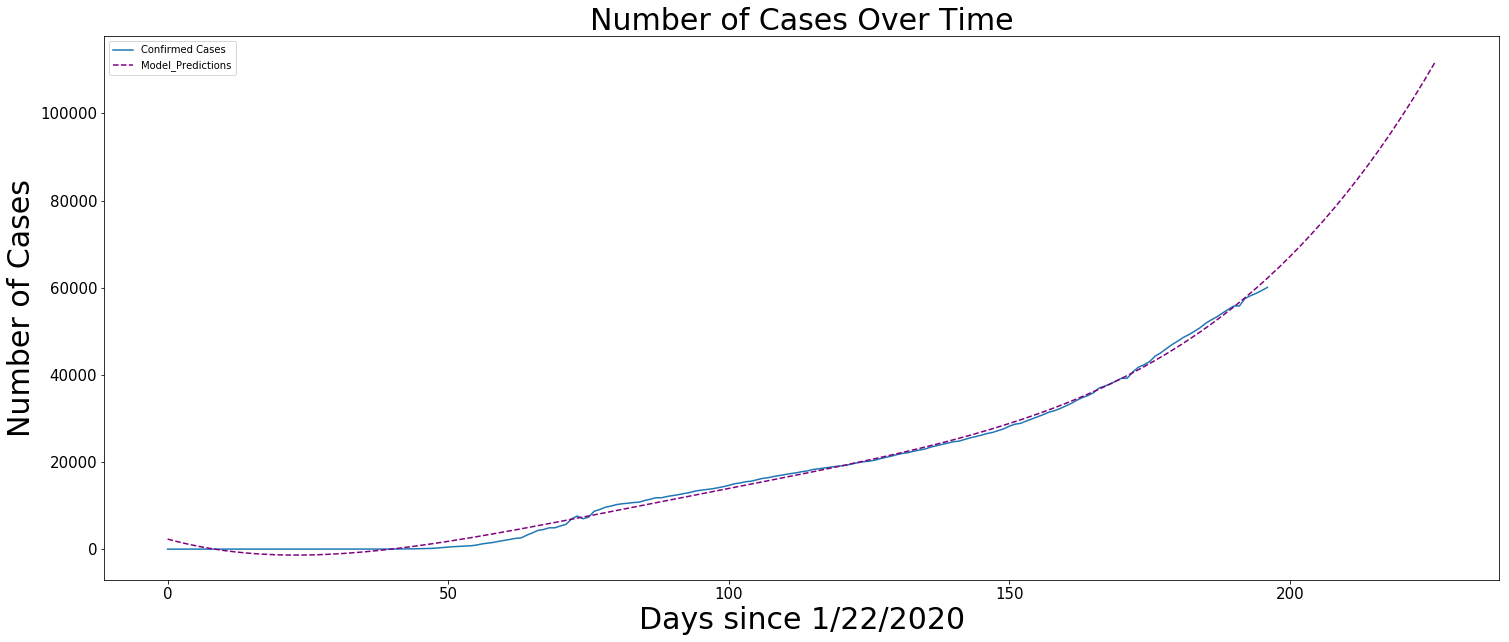

In [35]:
# Plotting data

plt.figure(figsize=(25,10))
plt.plot(x,y)
plt.plot(future_forecast,poly_pred, linestyle='dashed', color='purple')
plt.title('Number of Cases Over Time',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Model_Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

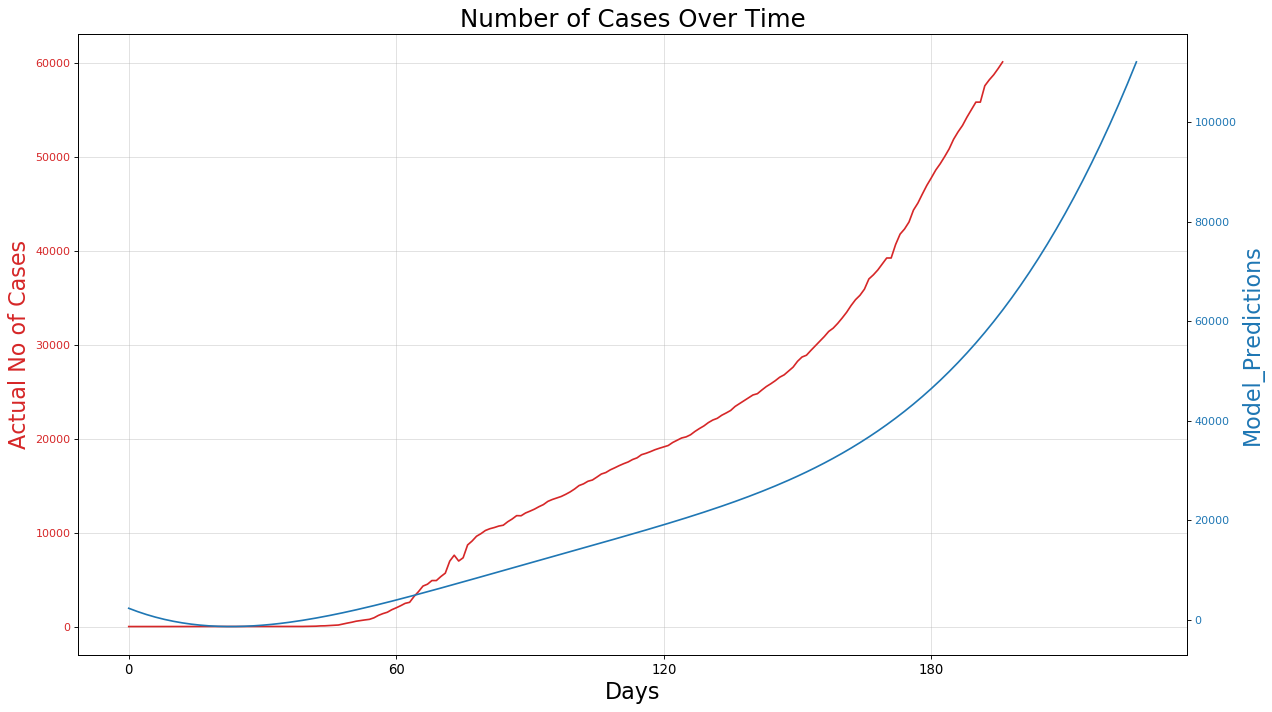

In [36]:


# Plot Line1 (Left Y Axis)
fig, ax1 = plt.subplots(1,1,figsize=(16,9), dpi= 80)
ax1.plot(x,y, color='tab:red')

# Plot Line2 (Right Y Axis)
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.plot(future_forecast,poly_pred, color='tab:blue')

# Decorations
# ax1 (left Y axis)
ax1.set_xlabel('Days', fontsize=20)
ax1.tick_params(axis='x', rotation=0, labelsize=12)
ax1.set_ylabel('Actual No of Cases', color='tab:red', fontsize=20)
ax1.tick_params(axis='y', rotation=0, labelcolor='tab:red' )
ax1.grid(alpha=.4)

# ax2 (right Y axis)
ax2.set_ylabel("Model_Predictions", color='tab:blue', fontsize=20)
ax2.tick_params(axis='y', labelcolor='tab:blue')
ax2.set_xticks(np.arange(0, len(x), 60))
ax2.set_xticklabels(x[::60], rotation=90, fontdict={'fontsize':10})
ax2.set_title("Number of Cases Over Time", fontsize=22)
fig.tight_layout()
plt.show()

In [37]:
#df_NYC_train[:-30]

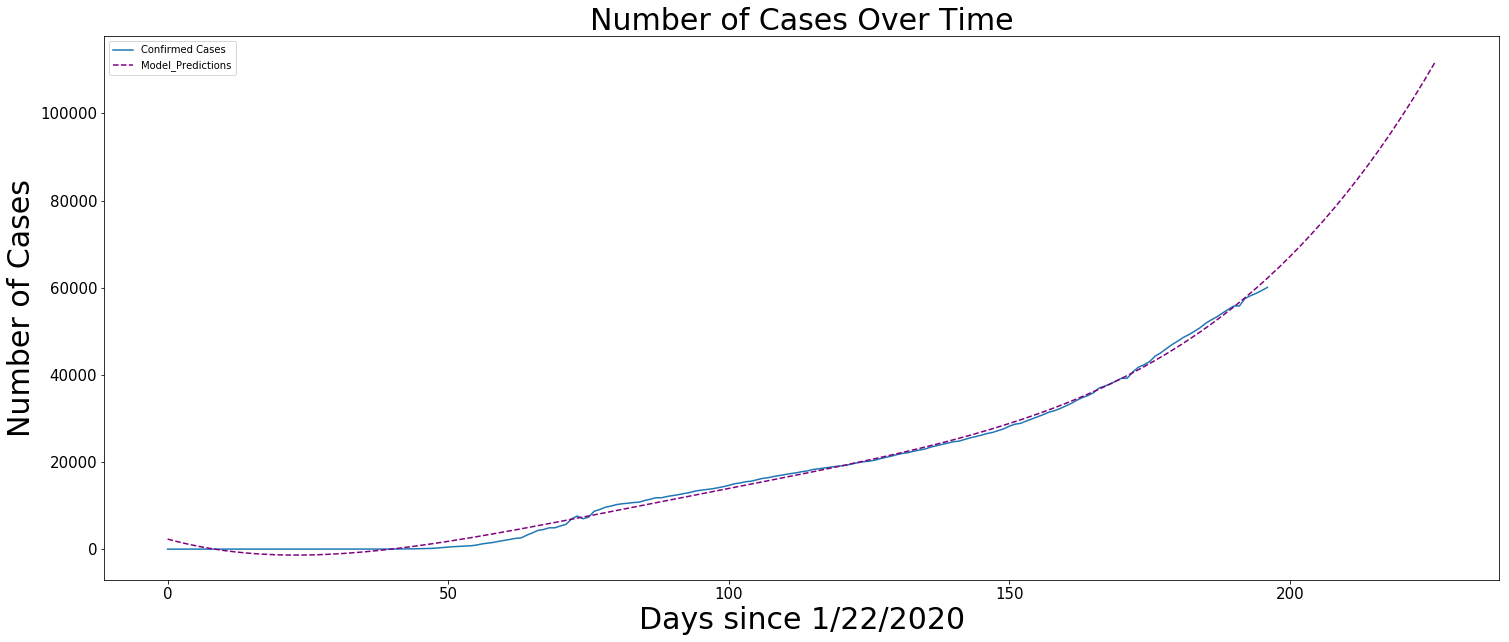

In [38]:
plt.figure(figsize=(25,10))
plt.plot(x,y)
plt.plot(future_forecast,poly_pred, linestyle='dashed', color='purple')
plt.title('Number of Cases Over Time',size=30)
plt.xlabel('Days since 1/22/2020',size=30)
plt.ylabel('Number of Cases',size=30)
plt.legend(['Confirmed Cases','Model_Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()